In [9]:
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Maximum, MaxPooling3D, Conv2DTranspose
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import SVG
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.layers import Input

import numpy as np
import operator
import pandas as pd

from util.common import to_rgb_img
from util.ccp import CCP_COLOR_MAP
from util.io import open_images

In [10]:
DATASET_X_PATH = '/home/danfergo/SIG/Code/Experiments/data/ccp/x'
DATASET_Y_PATH = '/home/danfergo/SIG/Code/Experiments/data/ccp/y'
I_SIZE = 150

In [11]:
train_x = np.array(open_images(DATASET_X_PATH + '/train'))
train_y = np.array(open_images(DATASET_Y_PATH + '/train'))

validation_x = np.array(open_images(DATASET_X_PATH + '/validation'))
validation_y = np.array(open_images(DATASET_Y_PATH + '/validation'))

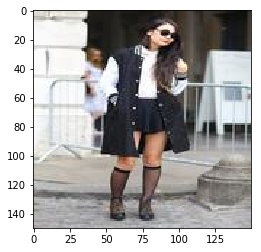

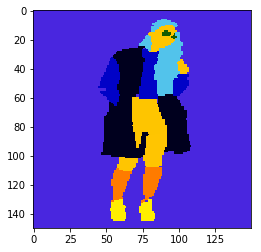

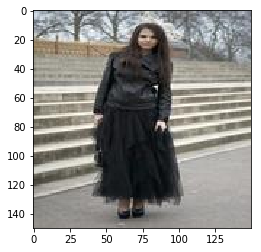

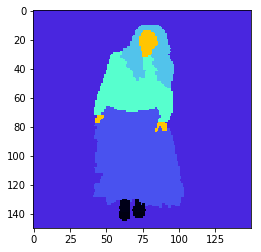

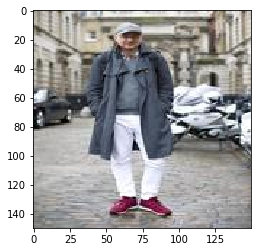

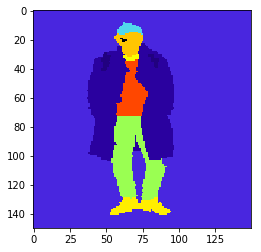

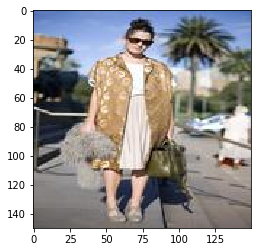

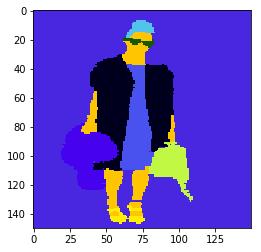

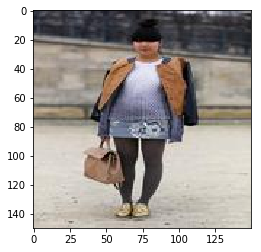

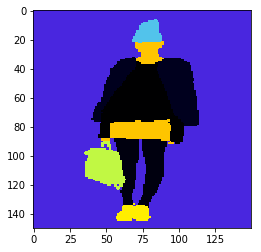

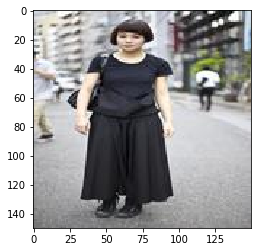

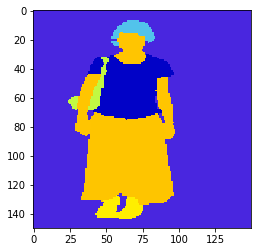

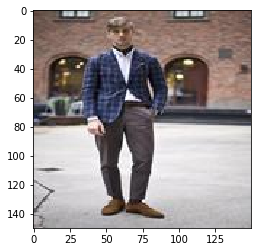

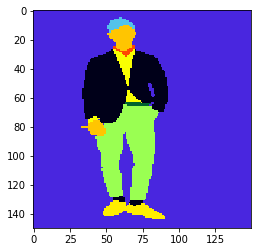

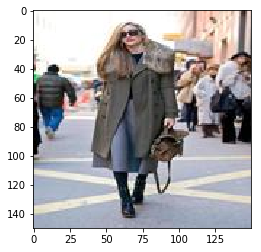

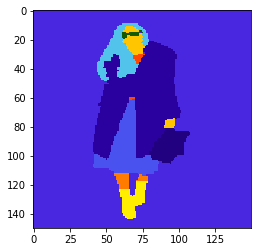

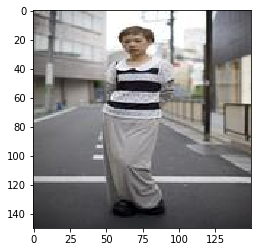

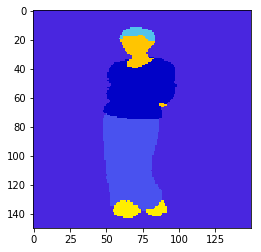

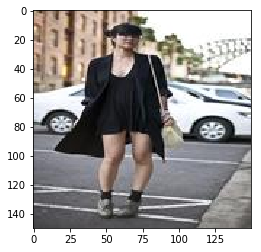

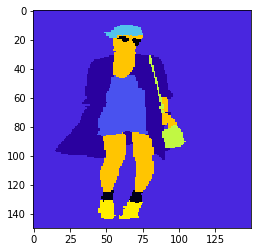

In [12]:
for i in range(0,10):
    plt.imshow(np.uint8(train_x[i]))
    plt.show()

    plt.imshow(np.uint8(to_rgb_img(train_y[i], CCP_COLOR_MAP)))
    plt.show()

In [13]:
from keras.layers.normalization import BatchNormalization
from keras import regularizers


model = Sequential()
# padding='same', 
model.add(Conv2D(3, (3, 3), input_shape=(150, 150, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2DTranspose(64, (3,3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2DTranspose(64, (3,3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2DTranspose(64, (3,3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2DTranspose(3, (3,3), kernel_regularizer=regularizers.l2(0.01)))
model.add(Activation('relu'))

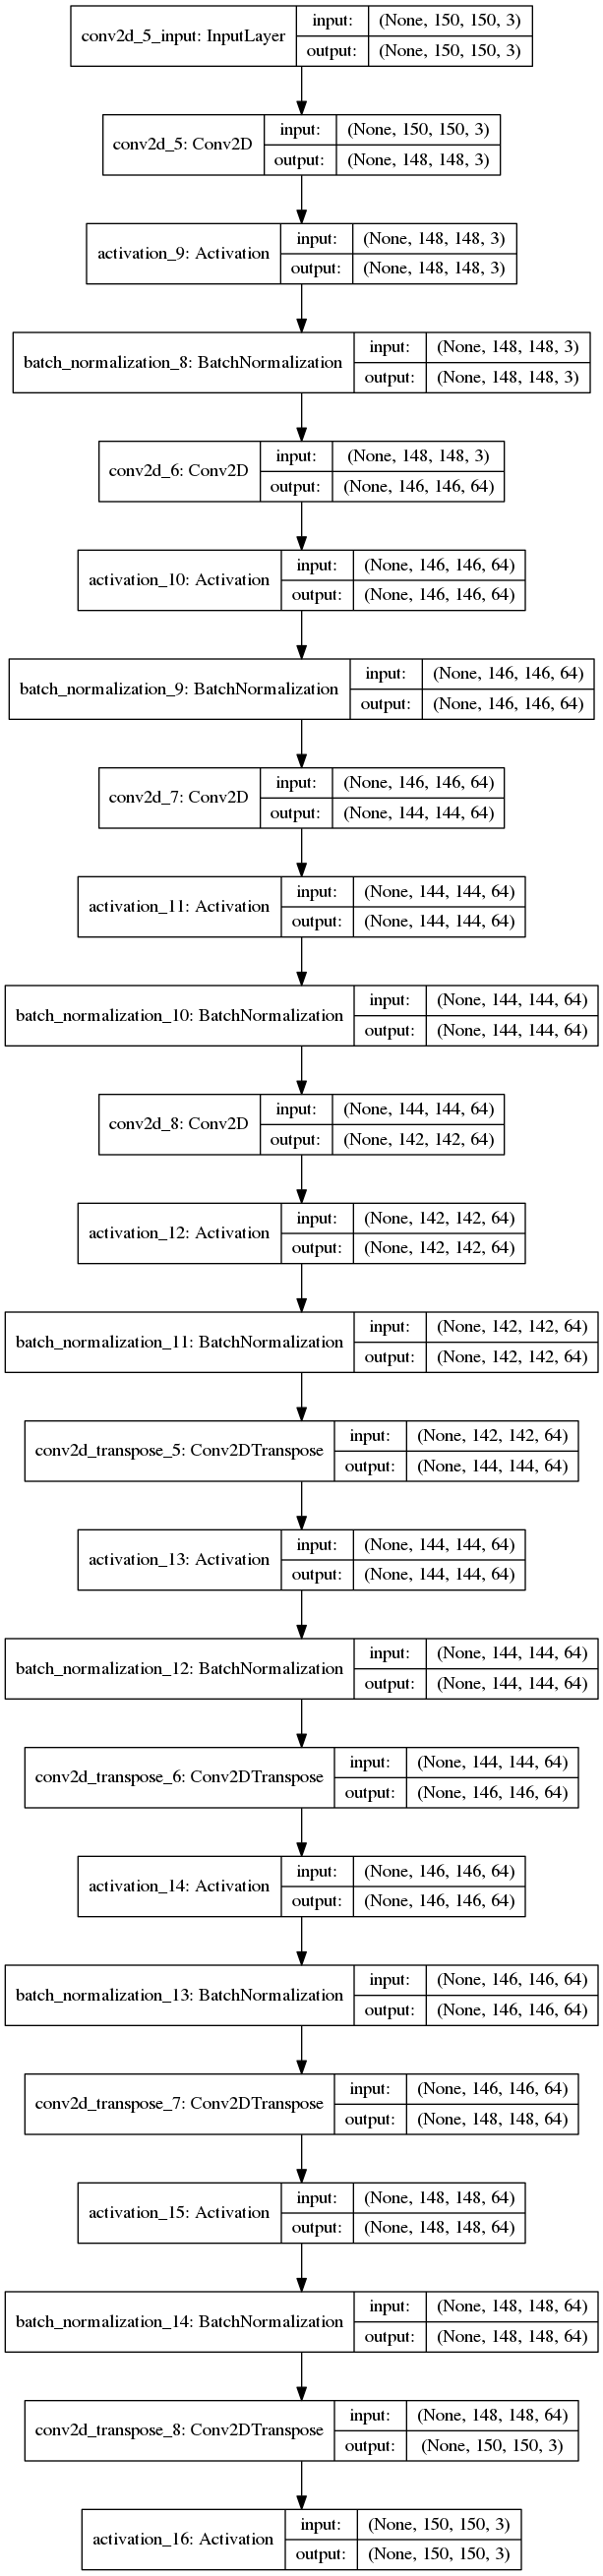

In [14]:
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model.png', show_shapes=True)
Image(filename='model.png')

In [15]:
from keras.optimizers import Adadelta
HISTORY_PATH = '/home/danfergo/SIG/Code/Experiments/history/experiment_3.1'
# model.load_weights(HISTORY_PATH + '_weights.pkl')
# optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0005, nesterov=True)
# optimizer = Adadelta(lr=0.9, rho=0.95, epsilon=1e-08, decay=0.0)
model.compile(loss='mean_absolute_error',  optimizer='adadelta', metrics=[])

In [16]:
history = model.fit(
        train_x, train_y,
        epochs=120,
        batch_size=32,
        validation_data=(validation_x,validation_y)
        )

Train on 804 samples, validate on 89 samples
Epoch 1/120
804/804 [==============================] - 23s - loss: 9.0733 - val_loss: 8.7683

In [ ]:
# save weights
HISTORY_PATH = '/home/danfergo/SIG/Code/Experiments/history/experiment_3.1'
model.save_weights(HISTORY_PATH + '_weights.pkl')

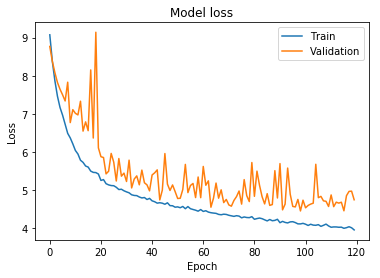

In [18]:
# (re)save and load history
import pickle

past_history = {}

try:
    pkl_file = open(HISTORY_PATH + '_history.pkl', 'rb')
    past_history = pickle.load(pkl_file)
    pkl_file.close()
except:
    pass

full_history = {}

for k in history.history:
    if k in past_history:
        full_history[k] = np.concatenate((past_history[k], history.history[k]), axis=0)
    else:
        full_history[k] = history.history[k]

pkl_file = open(HISTORY_PATH + '_history.pkl', 'wb')
pickle.dump(full_history, pkl_file)
pkl_file.close()



# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [19]:
x_test, y_test = (validation_x, validation_y)
y_pred = model.predict(x_test, batch_size=100)

### Test

In [20]:
def map_row_color(r):
    global COLOR_MAP
    #print(r)
    x = int(np.average(r))    
    x = max(x, 0)
    x = min(58, x)
    return COLOR_MAP[x]

def get_img(y):
    s  = y.shape
    yy = np.zeros((s[0], s[1], 3))   
    yy = np.apply_along_axis(map_row_color, 2, y)
    return yy

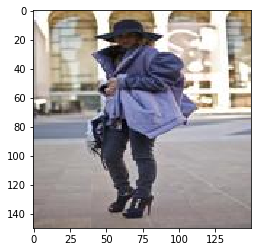

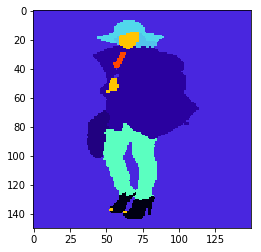

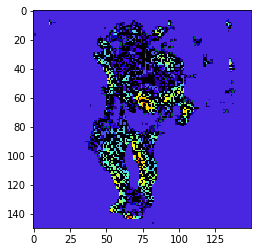

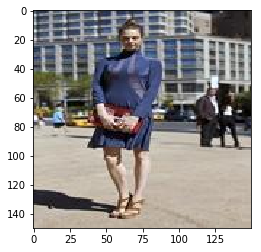

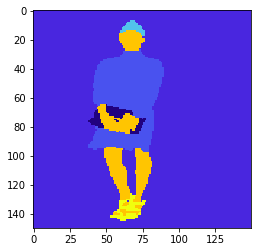

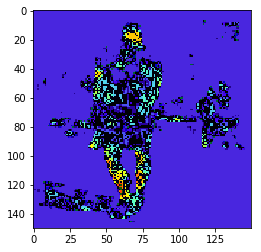

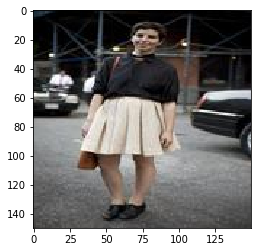

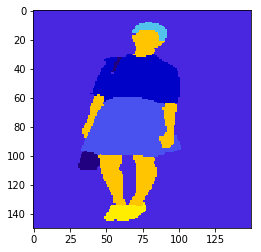

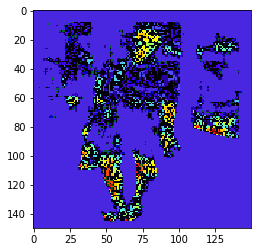

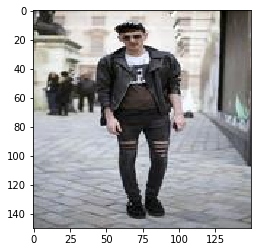

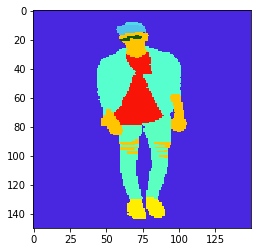

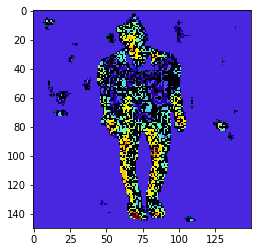

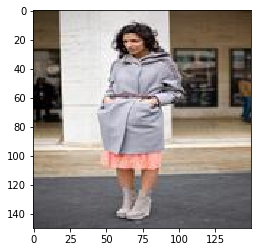

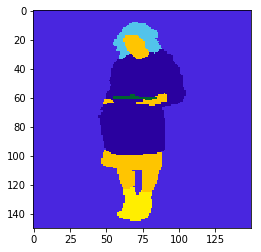

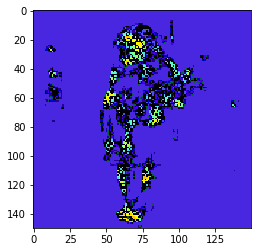

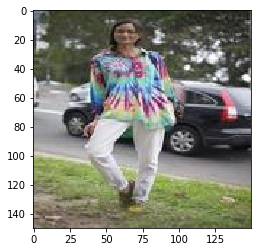

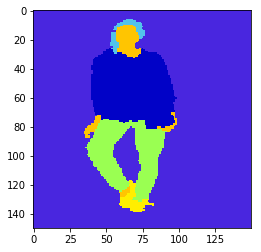

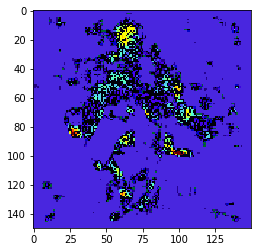

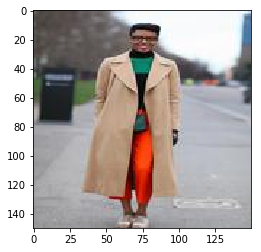

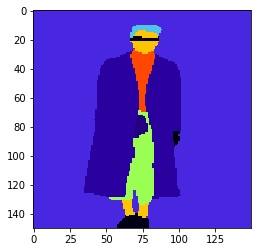

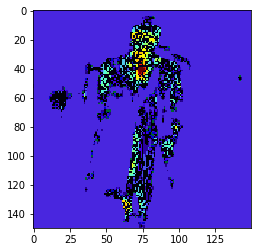

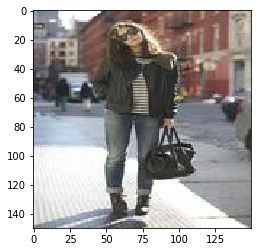

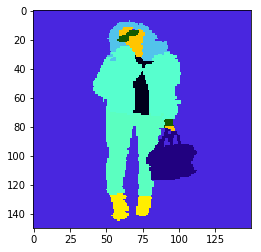

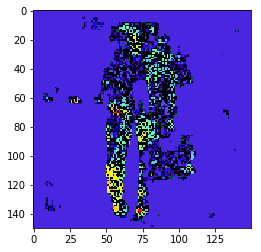

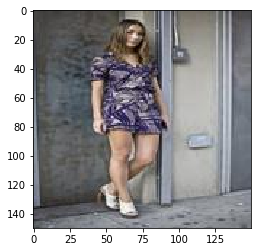

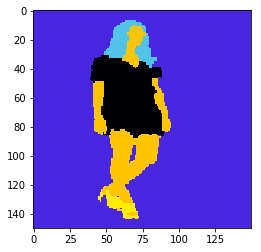

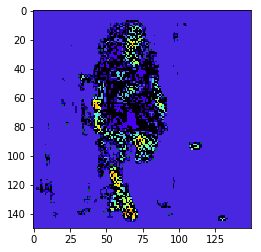

In [21]:
for i in range(1, 10):
    plt.imshow(np.uint8(x_test[i]))
    plt.show()
    plt.imshow(np.uint8(to_rgb_img(y_test[i],CCP_COLOR_MAP)))
    plt.show()
    plt.imshow(np.uint8(to_rgb_img(y_pred[i], CCP_COLOR_MAP)))
    plt.show()